<a href="https://colab.research.google.com/github/Kyoung-mii/DeepLearning/blob/main/05_convolutionalNeuralNetwork/5_convolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.2.5 실습 : 합성곱 신경망

## 코드 5-1 [1] 패키지 불러오기

In [1]:
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

## 코드 5-1 [2]  데이터 준비하기

In [5]:
(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 코드 5-1 [3] 데이터 확인하기

60000 60000
10000 10000
28 28
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95  

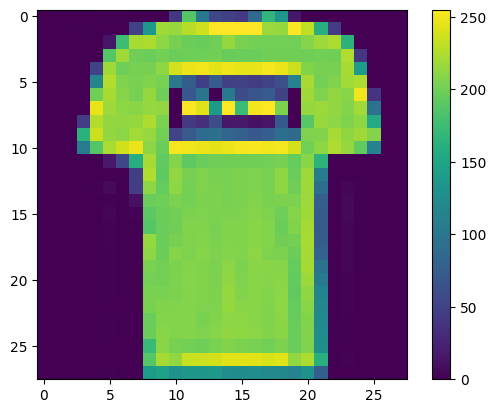

In [10]:
print(train_images.shape[0], train_labels.shape[0])
print(test_images.shape[0], test_labels.shape[0])
print(train_images.shape[1], train_images.shape[2])
print(train_labels[:20])
print(train_images[1])

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## 코드 5-1 [4]  범주 확인하기

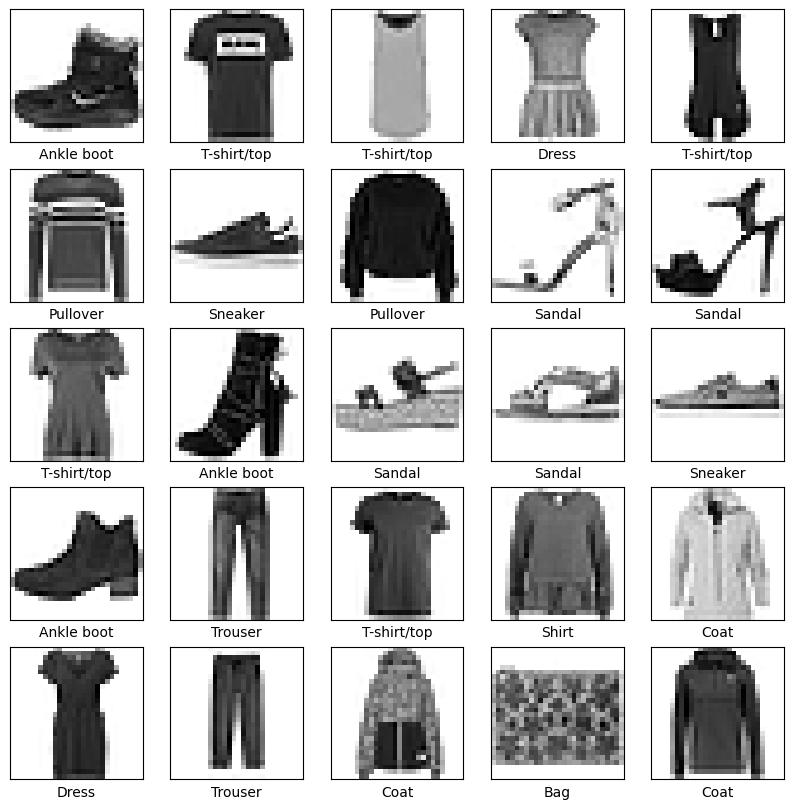

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 코드 5-1 [5] 정규화하기

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## 코드 5-1 [6] 모델 생성하기

In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3),
                        filters = 16),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       346,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,690 (1.33 MB)

 Trainable params: 347,690 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

## 코드 5-1 [7] 학습하기

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 5,
                    validation_data = (test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8062 - loss: 0.5474 - val_accuracy: 0.8782 - val_loss: 0.3331
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9012 - loss: 0.2772 - val_accuracy: 0.8952 - val_loss: 0.3001
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9167 - loss: 0.2301 - val_accuracy: 0.9009 - val_loss: 0.2862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9282 - loss: 0.1983 - val_accuracy: 0.8996 - val_loss: 0.2848
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9405 - loss: 0.1650 - val_accuracy: 0.9077 - val_loss: 0.2745


## 코드 5-1 [8] 학습정보 함수 구현 및 확인하기

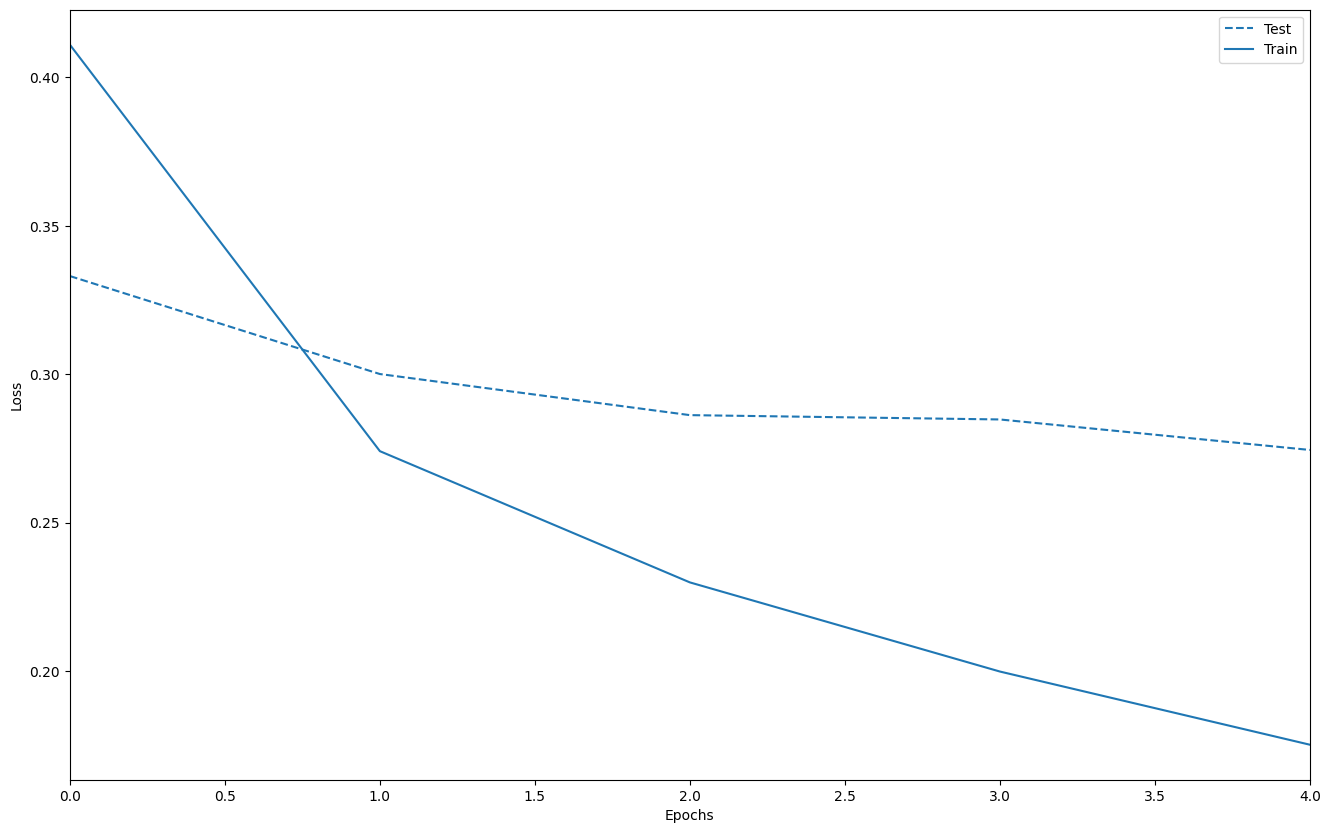

In [19]:
def plot_loss(history):
    plt.figure(figsize = (16, 10))
    val = plt.plot(history.epoch, history.history['val_loss'],
                   '--', label = 'Test')
    plt.plot(history.epoch, history.history['loss'],
                   color = val[0].get_color(), label = 'Train')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.xlim([0, max(history.epoch)])
plot_loss(history)

## 코드 5-1 [9] 성능 평가 함수 구현 및 확인하기

In [20]:
def evaluation_model(model):
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print('정확도:', test_accuracy)

evaluation_model(model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9088 - loss: 0.2718
정확도: 0.9077000021934509
